## Limiarização

### Imagens para análise
Serão utilizadas a imagem beansp.tiff e gray21.515.tiff, uma para simular aplicações em figuras reais, e outra para explorar os parâmetros de limiarização, já que possui faixas de cinza bem definidas.

In [11]:
#Inicialização
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
import math as m
import navFunc as nf
from navFunc.cls import cls
from IPython.display import Image

In [12]:
imgA = cv.imread("../gcPDI/imgPDI/beansp.tiff",0)
imgB = cv.imread("../gcPDI/imgPDI/gray21.512.tiff",0)

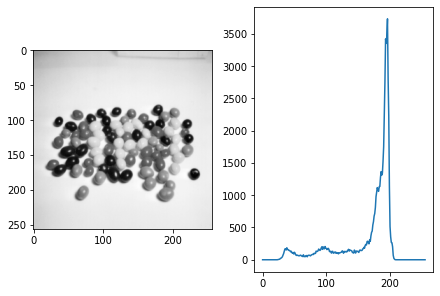

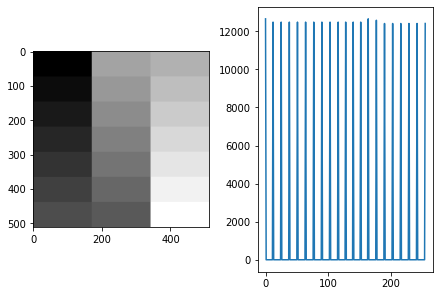

In [13]:
#Início: Script de plotagem
f, axarr = plt.subplots(1, 2, constrained_layout=True)
#Matrix[i][j]
axarr[0].imshow(imgA,"gray")
axarr[1].plot(cv.calcHist([imgA],[0],None,[256],[0,256]))
plt.show()
#Final
#Início: Script de plotagem
f, axarr = plt.subplots(1, 2, constrained_layout=True)
#Matrix[i][j]
axarr[0].imshow(imgB,"gray")
axarr[1].plot(cv.calcHist([imgB],[0],None,[256],[0,256]))
plt.show()
#Final

### Teoria

O conceito de limiarização é introduzido em um processo de transformação na imagem com base em limiares pré-definidos. Esse processo pode particionar imagens diretamente em regiões baseadas no valor de intensidade e/ou propriedade desse valor.

Limiarização de nível de cinza é um processo de segmentação simples. Muitos objetos ou regiões de imagens são caracterizados por refletividade constante ou absorção de luz de suas superfícies. Então, uma constante de brilho ou um limite pode ser determinados para segmentar objetos e fundo, regiões de interesse ou não.

In [14]:
#Mini-script para avaliar histograma
dst = cv.calcHist([imgB],[0],None,[256],[0,256])
I,V = dst.shape
for i in range(I):
    if dst[i]>0:
        print("i = {}\tval = {}".format(i,dst[i]))
#print(cv.calcHist([imgB],[0],None,[256],[0,256]))

i = 0	val = [12654.]
i = 12	val = [12483.]
i = 25	val = [12483.]
i = 38	val = [12483.]
i = 51	val = [12483.]
i = 64	val = [12483.]
i = 77	val = [12483.]
i = 90	val = [12483.]
i = 103	val = [12483.]
i = 116	val = [12483.]
i = 128	val = [12483.]
i = 140	val = [12483.]
i = 152	val = [12483.]
i = 164	val = [12654.]
i = 177	val = [12580.]
i = 190	val = [12410.]
i = 203	val = [12410.]
i = 216	val = [12410.]
i = 229	val = [12410.]
i = 242	val = [12410.]
i = 255	val = [12410.]


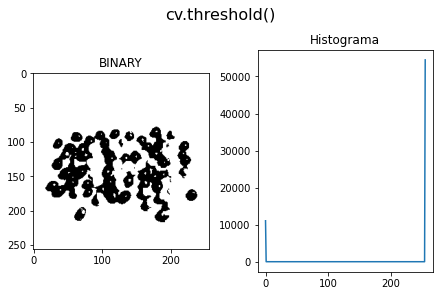

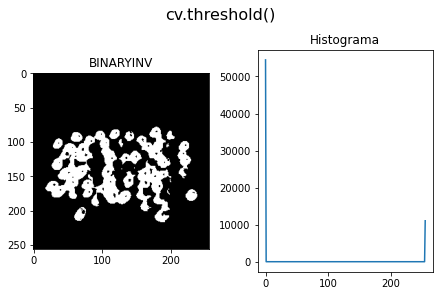

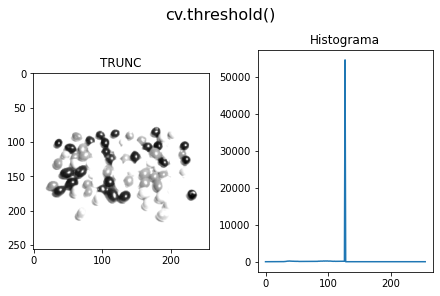

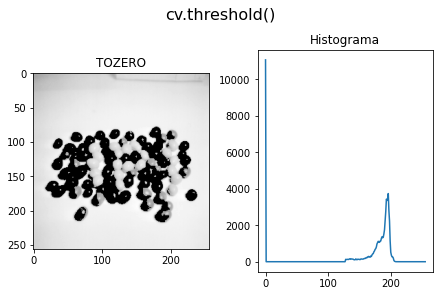

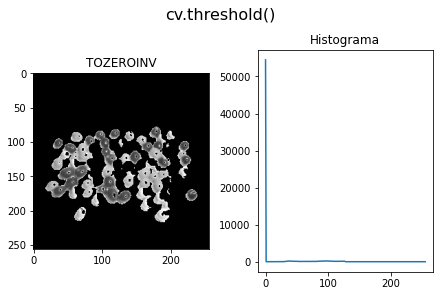

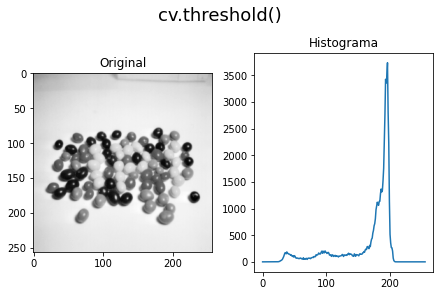

In [15]:
valueT = 127    #<------Input: Valor Threshold
titleMethods = ["BINARY", "BINARYINV", "TRUNC", "TOZERO", "TOZEROINV"]
methods = [cv.THRESH_BINARY, cv.THRESH_BINARY_INV, cv.THRESH_TRUNC, cv.THRESH_TOZERO, cv.THRESH_TOZERO_INV]
for i in range(6):
    f, axarr = plt.subplots(1,2,constrained_layout=True)
    if i==5:
        #Original
        axarr[0].imshow(imgA,"gray")
        axarr[0].set_title("Original")
        #
        axarr[1].plot(cv.calcHist([imgA],[0],None,[256],[0,256]))
        axarr[1].set_title("Histograma")
        f.suptitle("cv.threshold()",fontsize=18)
        plt.show()
    else:
        ret,dst=cv.threshold(imgA,valueT,255,methods[i])
        axarr[0].imshow(dst,"gray")
        axarr[0].set_title(titleMethods[i])
        axarr[1].plot(cv.calcHist([dst],[0],None,[256],[0,256]))
        axarr[1].set_title("Histograma")
        f.suptitle("cv.threshold()",fontsize=16)
        plt.show()

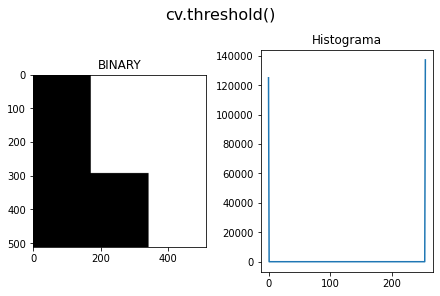

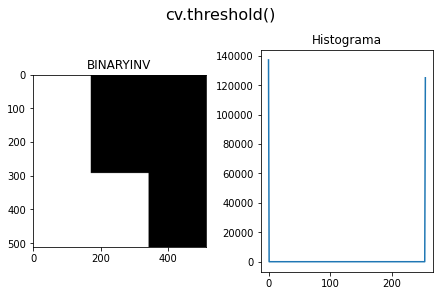

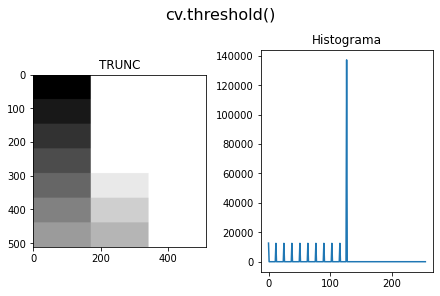

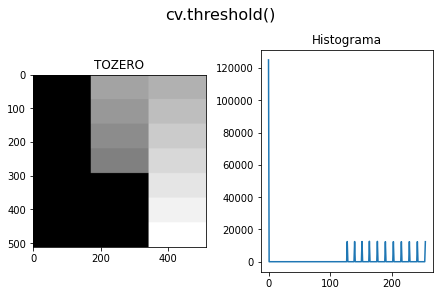

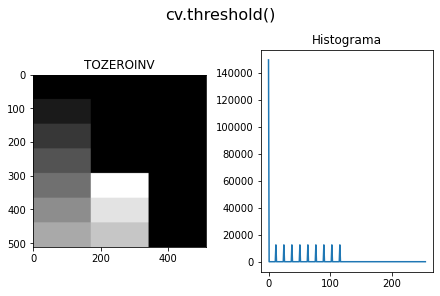

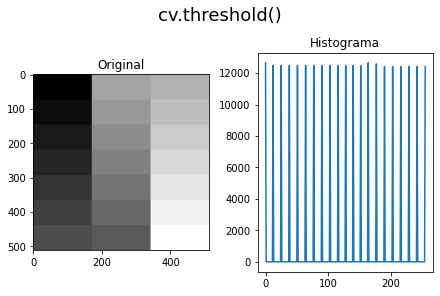

In [6]:
valueT = 127    #<------Input: Valor Threshold
titleMethods = ["BINARY", "BINARYINV", "TRUNC", "TOZERO", "TOZEROINV"]
methods = [cv.THRESH_BINARY, cv.THRESH_BINARY_INV, cv.THRESH_TRUNC, cv.THRESH_TOZERO, cv.THRESH_TOZERO_INV]
for i in range(6):
    f, axarr = plt.subplots(1,2,constrained_layout=True)
    if i==5:
        #Original
        axarr[0].imshow(imgB,"gray")
        axarr[0].set_title("Original")
        #
        axarr[1].plot(cv.calcHist([imgB],[0],None,[256],[0,256]))
        axarr[1].set_title("Histograma")
        f.suptitle("cv.threshold()",fontsize=18)
        plt.show()
    else:
        ret,dst=cv.threshold(imgB,valueT,255,methods[i])
        axarr[0].imshow(dst,"gray")
        axarr[0].set_title(titleMethods[i])
        axarr[1].plot(cv.calcHist([dst],[0],None,[256],[0,256]))
        axarr[1].set_title("Histograma")
        f.suptitle("cv.threshold()",fontsize=16)
        plt.show()

### Desenvolvimento da Limiarização

A transformação ocorre mediante a aplicação da seguinte função: 

$g(x,y) = máx$, se $f(x,y) > T$ 

ou 

$g(x) = 0$, se $f(x,y) \leq T$, onde $g(x)$ representa o valor de intendidade no ponto em questão.

O resultado é uma imagem com valores discretos, distintos entre o máximo e o mínimo da intensidade da imagem.

In [7]:
def limiar (Filter):
    # Load image into numpy matrix
    A = Filter.img
    size = nf.structtype()
    size.A = nf.structtype()
    size.A.lin, size.A.col = A.shape
    #################### Limiar
    Tmin = np.min(A)
    Tmax = np.max(A)
    D = np.zeros(A.shape)
    for j in range((0), size.A.lin):
        for k in range((0), size.A.col):
            if A[j,k] > Filter.limiar:
                D[j, k] = Tmax
            else:
                D[j, k] = Tmin
    D = np.uint8(D)
    print('#',end="L")
    return D

In [8]:
def limApply(img, limVal):
    # Cria variavel do tipo struct (similar ao matlab):
    Filter = nf.structtype()                # Cria variavel do tipo struct (similar ao matlab)
    Filter.img = np.array(img)
    Filter.imgSize = nf.structtype()
    Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape
    # Limiar def:
    Filter.limiar = limVal
    numAp = 1;
    U = np.zeros((numAp, Filter.imgSize.lin, Filter.imgSize.col))
    for k in range(0, numAp):
        if k == 0:
            U[k,:,:] = limiar(Filter)            
        else:
            Filter.img = U[k-1,:,:]
            U[k, :, :] = limiar(Filter)            
    return np.uint8(U[(numAp - 1),:,:]) #Força a matriz retornada a ter valores Inteiros 8bits

#L

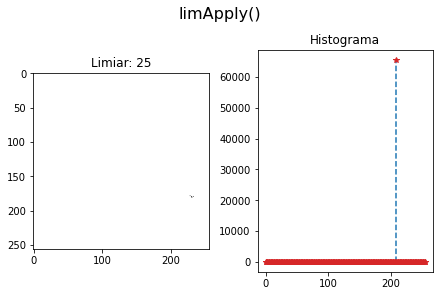

#L

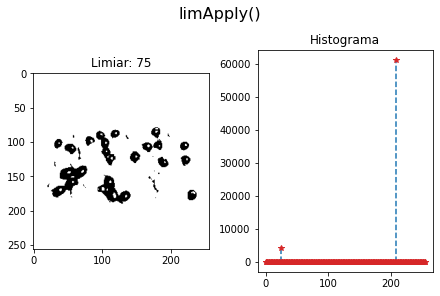

#L

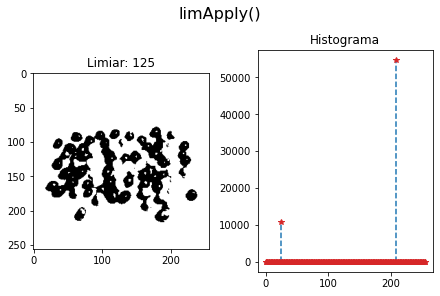

#L

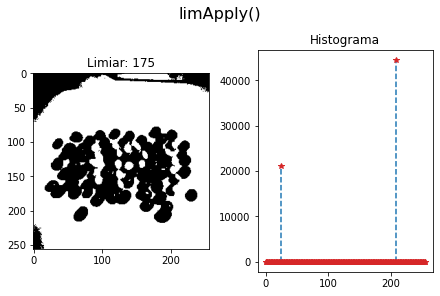

#L

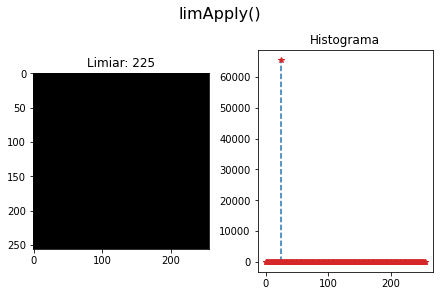

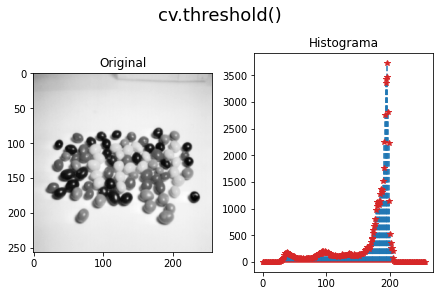

In [9]:
valT = [25,75,125,175,225]   #<------Input: Valor Threshold
for i in range(6):
    f, axarr = plt.subplots(1,2,constrained_layout=True)
    if i==5:
        #Original
        axarr[0].imshow(imgA,"gray")
        axarr[0].set_title("Original")
        hist = cv.calcHist([imgA],[0],None,[256],[0,256])
        axarr[1].stem(hist,linefmt='C0--',markerfmt='C3*')
        axarr[1].set_title("Histograma")
        f.suptitle("cv.threshold()",fontsize=18)
        plt.show()
    else:
        dst = limApply(imgA,valT[i])
        axarr[0].imshow(dst,"gray")
        axarr[0].set_title("Limiar: {}".format(valT[i]))
        hist = cv.calcHist([dst],[0],None,[256],[0,256])
        axarr[1].stem(hist,linefmt='C0--',markerfmt='C3*')
        axarr[1].set_title("Histograma")
        f.suptitle("limApply()",fontsize=16)
        plt.show()

#L

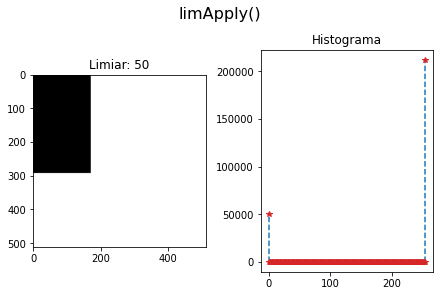

#L

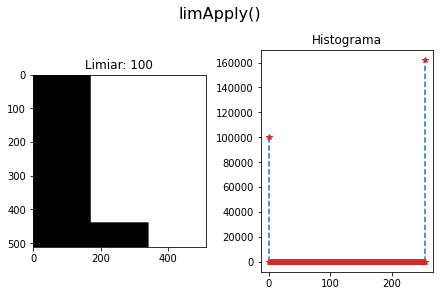

#L

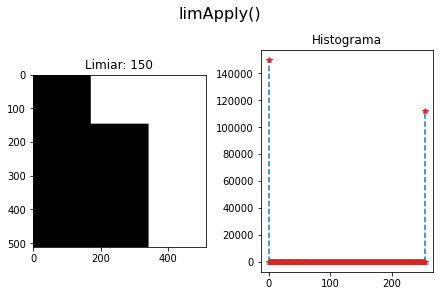

#L

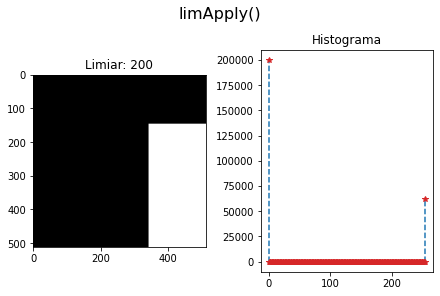

#L

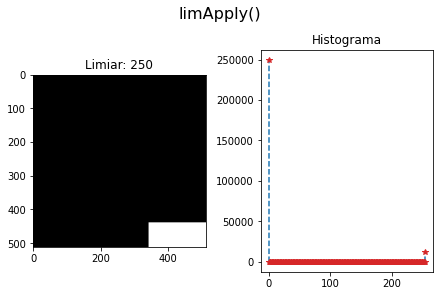

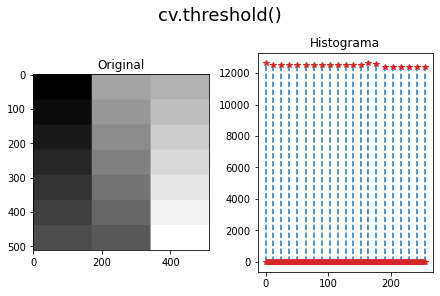

In [10]:
valT = [50,100,150,200,250]   #<------Input: Valor Threshold
for i in range(6):
    f, axarr = plt.subplots(1,2,constrained_layout=True)
    if i==5:
        #Original
        axarr[0].imshow(imgB,"gray")
        axarr[0].set_title("Original")
        hist = cv.calcHist([imgB],[0],None,[256],[0,256])
        axarr[1].stem(hist,linefmt='C0--',markerfmt='C3*')
        axarr[1].set_title("Histograma")
        f.suptitle("cv.threshold()",fontsize=18)
        plt.show()
    else:
        dst = limApply(imgB,valT[i])
        axarr[0].imshow(dst,"gray")
        axarr[0].set_title("Limiar: {}".format(valT[i]))
        hist = cv.calcHist([dst],[0],None,[256],[0,256])
        axarr[1].stem(hist,linefmt='C0--',markerfmt='C3*')
        axarr[1].set_title("Histograma")
        f.suptitle("limApply()",fontsize=16)
        plt.show()

### Conclusões

A ferramenta de Limiarização é simples, tanto de implementar quanto de processar, e efetiva para segmentar imagens de acordo com a intesidade de cinza desejada. A implementação do código corresponde ao cv.threshold() quando parametrizado no modo Binário, ou seja, até o valor limiar será tido como 0 (preto) e após o valor limiar será tido como 255 (branco).

A Limiarização usada em conjunto com as ferramentas de histogramas permite determinar com mais rapidez e facilidade qual valor de limiar a utilizar, bem como ver os efeitos após a sua utilização. Sem o uso de histogramas, a limiarização ficaria presa a usar tentativa e erro.